## TOC:

*[01. Importing libraries]

*[02. Importing data]

*[03. Task]

*[04. Identifying PII (Personally Identifiable Information)]

*[05. Creating Customer Profiles]

*[06. Creating visualizations]

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [2]:
#defining path

path = r'C:\Users\Jonathan\08-2023 Instacart Basket Analysis'

In [3]:
#importing dataset

df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Total Combined Data.pkl'))

# 03. Task

# 04. Identifying PII (Personally Identifiable Information)

In [4]:
#expanding view of columns

pd.options.display.max_columns = None

In [5]:
#Checking Dataframe for PII

df_instacart.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_prod_price,spender_type,frequency,frequency_type,First Name,Last Name,Gender,STATE,Age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


First Name and Last Name are PII and should be removed from the dataframe; 

I will also be removing busiest day column as it can be considered duplicate information (similar to busiest days column) and unnecessary;

In [6]:
#creating a dataframe with those PII columns (as well as unnecessary data) removed; 

df_instacart_PII_clean = df_instacart.drop(['busiest day', 'First Name', 'Last Name'], axis = 1)

In [7]:
df_instacart_PII_clean.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_prod_price,spender_type,frequency,frequency_type,Gender,STATE,Age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


# 05. Creating Customer Profiles

Defining and creating "Region" column to analyze spending habits based on U.S. Regions

In [8]:
#checking value counts for STATE column

df_instacart_PII_clean['STATE'].value_counts()

California              630308
Pennsylvania            629833
Rhode Island            621341
Georgia                 620618
Arizona                 619810
North Carolina          618268
Oklahoma                615354
Minnesota               613699
New Mexico              611481
Maine                   610309
Alaska                  610279
Wyoming                 609764
Massachusetts           608964
Arkansas                608035
Mississippi             607362
Texas                   605608
North Dakota            605317
Nevada                  605083
Missouri                604383
Virginia                603563
South Dakota            602744
Kansas                  602396
Louisiana               602384
Alabama                 602310
South Carolina          602049
New York                601409
Washington              601352
Montana                 600639
Michigan                600593
Kentucky                600323
Colorado                599764
Oregon                  599340
Delaware

In [9]:
#For-Loop If statement for Region

result = []

for value in df_instacart_PII_clean['STATE']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append("Northeast")
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append("Midwest")
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append("South")
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append("West")
    else:
        result.append("NaN")

In [10]:
#creating new column for Region

df_instacart_PII_clean['Region'] = result

In [11]:
df_instacart_PII_clean['Region'].value_counts(dropna = False)

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: Region, dtype: int64

In [12]:
#creating a crosstab to compare Region to Spender_type

crosstab = pd.crosstab(df_instacart_PII_clean['Region'], df_instacart_PII_clean['spender_type'], dropna = False)

In [13]:
crosstab

spender_type,High spender,Low spender
Region,,
Midwest,149817,7027107
Northeast,101420,5320605
South,196523,10002459
West,147803,7684007


Comparing these two columns we can look at the ratio of high spenders to low spenders in each Region we see that every region has contains 2% High Spenders to 98% Low Spenders; Thus there are no difference in spending habits between regions; 

Create an en exclusion flag for low-activity customers (less than 5 orders) and exclude them from the data. Export this sample

In [14]:
#creating exclusion flag for low activity customers

df_instacart_PII_clean.loc[df_instacart_PII_clean['max_order'] < 5, 'activity_level'] = 'Low Activity'

In [15]:
#exclusion flag for all other customers

df_instacart_PII_clean.loc[df_instacart_PII_clean['max_order'] >= 5, 'activity_level'] = 'Active'

In [16]:
#checking value counts for flag

df_instacart_PII_clean['activity_level'].value_counts(dropna = False)

Active          29270938
Low Activity     1358803
Name: activity_level, dtype: int64

In [17]:
#create a subset for active users

df_active = df_instacart_PII_clean[df_instacart_PII_clean['activity_level']=='Active']

In [18]:
#checking value counts in dataframe

df_active['activity_level'].value_counts(dropna = False)

Active    29270938
Name: activity_level, dtype: int64

In [19]:
#export dataframe as prepared data

df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Active Customer Data.pkl'))

Create profiling variable based on age, income, certain goods in the "department_id" column, and number of dependents. You might also use "order_day_of_week" and "order_hour_of_day" columns if you think of a way they would impact customer profiles.

In [20]:
#creating a variable based on age

result_1 = []

for value in df_instacart_PII_clean['Age']:
    if value < 30:
        result_1.append("Young")
    elif (value >= 30) & (value < 55):
        result_1.append("Middle-aged")
    elif value >= 55:
        result_1.append("Old")
    else:
        result.append("NaN")

In [21]:
#creating new column for Age Group

df_instacart_PII_clean['Age Group'] = result_1

In [22]:
#checking value counts

df_instacart_PII_clean['Age Group'].value_counts(dropna = False)

Old            12873326
Middle-aged    12006203
Young           5750212
Name: Age Group, dtype: int64

<Axes: ylabel='Frequency'>

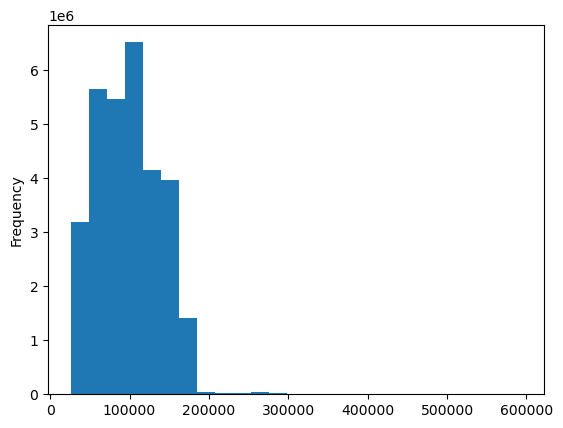

In [23]:
#creating a variable based on income; Need to check if the data makes sense using Histogram

df_instacart_PII_clean['income'].plot.hist(bins = 25)

In [24]:
#analyzing income

df_instacart_PII_clean['income'].describe()

count    3.062974e+07
mean     9.945980e+04
std      4.306626e+04
min      2.590300e+04
25%      6.706600e+04
50%      9.661200e+04
75%      1.279340e+05
max      5.939010e+05
Name: income, dtype: float64

In [25]:
#creating a variable based on income

result_2 = []

for value in df_instacart_PII_clean['income']:
    if value <= 67066:
        result_2.append("Lower Class")
    elif (value > 67066) & (value <= 127934):
        result_2.append("Middle Class")
    elif value > 127934:
        result_2.append("Higher Class")
    else:
        result_2.append("NaN")

I based the values for this variable on the 25% and 75% values of income based on this dataset; 

In [26]:
#creating new column for Income

df_instacart_PII_clean['Income Class'] = result_2

In [27]:
#checking value counts

df_instacart_PII_clean['Income Class'].value_counts(dropna = False)

Middle Class    15314934
Lower Class      7657453
Higher Class     7657354
Name: Income Class, dtype: int64

In [28]:
#checking value count for fam_status

df_instacart_PII_clean['fam_status'].value_counts(dropna = False)

married                             21509211
single                               5019732
divorced/widowed                     2629966
living with parents and siblings     1470832
Name: fam_status, dtype: int64

In [29]:
#creating a variable based on dependents

df_instacart_PII_clean.loc[(df_instacart_PII_clean['fam_status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_instacart_PII_clean['dependants']==0), 'Family Structure'] = 'Single with No Dependants'

In [30]:
#creating a variable based on dependents

df_instacart_PII_clean.loc[(df_instacart_PII_clean['fam_status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_instacart_PII_clean['dependants']>=1), 'Family Structure'] = 'Single with Dependants'

In [31]:
#creating a variable based on dependents

df_instacart_PII_clean.loc[(df_instacart_PII_clean['fam_status']== 'married') & (df_instacart_PII_clean['dependants']==1), 'Family Structure'] = 'Married with No Dependants'

In [32]:
#creating a variable based on dependents

df_instacart_PII_clean.loc[(df_instacart_PII_clean['fam_status']== 'married') & (df_instacart_PII_clean['dependants']>1), 'Family Structure'] = 'Married with Dependants'

In [33]:
#checking value counts of new flag

df_instacart_PII_clean['Family Structure'].value_counts(dropna = False)

Married with Dependants       14374522
Single with No Dependants      7649698
Married with No Dependants     7134689
Single with Dependants         1470832
Name: Family Structure, dtype: int64

In [34]:
#linking data dictionary

departments = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'),index_col = False)

In [35]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [36]:
#rename 'Unnamed: 0' column

departments.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [37]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
#checking data type before merge

departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [39]:
#checking data type before merge

df_instacart_PII_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30629741 entries, 0 to 30629740
Data columns (total 35 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   order_number           int64   
 3   order_day_of_week      int64   
 4   order_hour_of_day      int64   
 5   days_since_last_order  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  price_range_loc        object  
 14  busiest days           object  
 15  busiest_period_of_day  object  
 16  max_order              int64   
 17  loyalty_flag           object  
 18  avg_prod_price         float64 
 19  spender_type           object  
 20  frequency              float64 
 21  frequency_type         object

In [40]:
#merge data dictionary with dataset

df_instacart_PII_clean = df_instacart_PII_clean.merge(departments, on = 'department_id')

In [41]:
#check results

df_instacart_PII_clean.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_prod_price,spender_type,frequency,frequency_type,Gender,STATE,Age,date_joined,dependants,fam_status,income,_merge,Region,activity_level,Age Group,Income Class,Family Structure,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,Middle-aged,Lower Class,Married with Dependants,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,Middle-aged,Lower Class,Married with Dependants,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,Middle-aged,Lower Class,Married with Dependants,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,Middle-aged,Lower Class,Married with Dependants,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,Middle-aged,Lower Class,Married with Dependants,beverages


# 06. Creating visualizations

Text(0.5, 1.0, 'Number of Orders by Department')

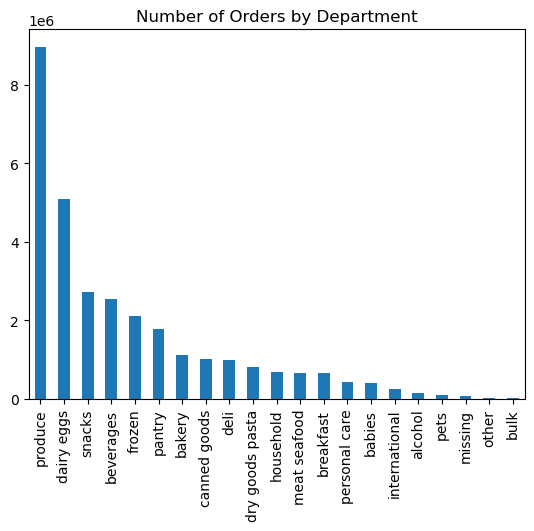

In [42]:
#Create a bar chart

orders_by_department = df_instacart_PII_clean['department'].value_counts().plot.bar()
plt.title('Number of Orders by Department')

In [43]:
#Export

orders_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_department.png'),bbox_inches='tight')

In [44]:
#Create profile based on most ordered and least ordered departments (produce and pets)

df_instacart_PII_clean.loc[df_instacart_PII_clean['department_id'] == 4, 'customer'] = 'produce_buyer'

In [45]:
df_instacart_PII_clean.loc[df_instacart_PII_clean['department_id'] != 4, 'customer'] = 'produce_non_buyer'

In [46]:
#User_id column used to identify unique customers

unique = df_instacart_PII_clean.loc[df_instacart_PII_clean['customer'] == 'produce_buyer', 'user_id'].unique()

In [47]:
df_instacart_PII_clean.loc[df_instacart_PII_clean['user_id'].isin(unique), 'customer'] = 'produce_buyer'

In [48]:
df_instacart_PII_clean['customer'].value_counts(dropna = False)

produce_buyer        30178572
produce_non_buyer      451169
Name: customer, dtype: int64

In [49]:
#Create profile based on most ordered and least ordered departments (produce and pets)

df_instacart_PII_clean.loc[df_instacart_PII_clean['department_id'] == 8, 'customer_1'] = 'pet_buyer'

In [50]:
df_instacart_PII_clean.loc[df_instacart_PII_clean['department_id'] != 8, 'customer_1'] = 'pet_non_buyer'

In [51]:
#User_id column used to identify unique customers

unique_1 = df_instacart_PII_clean.loc[df_instacart_PII_clean['customer_1'] == 'pet_buyer', 'user_id'].unique()

In [52]:
df_instacart_PII_clean.loc[df_instacart_PII_clean['user_id'].isin(unique), 'customer_1'] = 'pet_buyer'

In [53]:
df_instacart_PII_clean['customer_1'].value_counts(dropna = False)

pet_buyer        30182467
pet_non_buyer      447274
Name: customer_1, dtype: int64

Create Visualizations to show the distribution of profiles

Text(0.5, 1.0, 'Orders by Age Group')

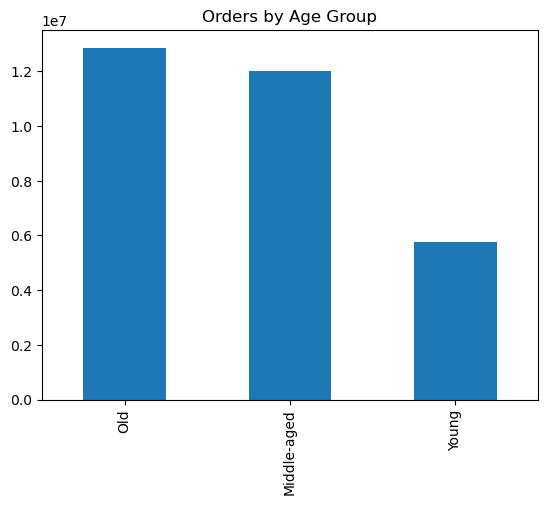

In [54]:
#Age

age_bar_chart = df_instacart_PII_clean['Age Group'].value_counts().plot.bar()
plt.title('Orders by Age Group')

In [55]:
#Export

age_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar_chart.png'),bbox_inches='tight')

Text(0.5, 1.0, 'Orders by Loyalty Status')

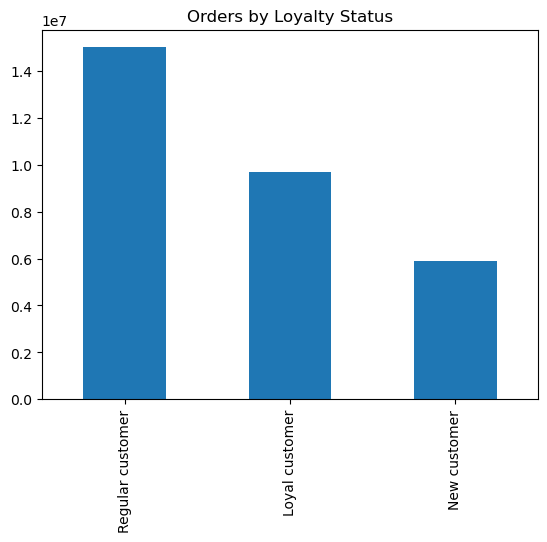

In [56]:
#Loyalty Flag

loyalty_bar_chart = df_instacart_PII_clean['loyalty_flag'].value_counts().plot.bar()
plt.title('Orders by Loyalty Status')

In [57]:
#Export

loyalty_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar_chart.png'),bbox_inches='tight')

Text(0.5, 1.0, 'Orders by Income Class')

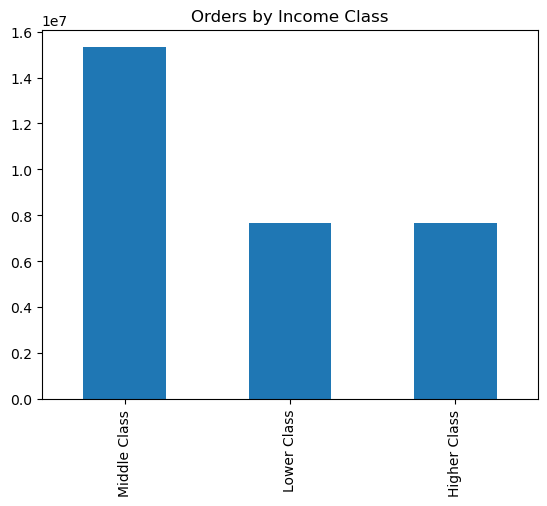

In [58]:
#Income

income_bar_chart = df_instacart_PII_clean['Income Class'].value_counts().plot.bar()
plt.title('Orders by Income Class')

In [59]:
#Export

income_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar_chart.png'),bbox_inches='tight')

Text(0.5, 1.0, 'Orders by Type of Buyer')

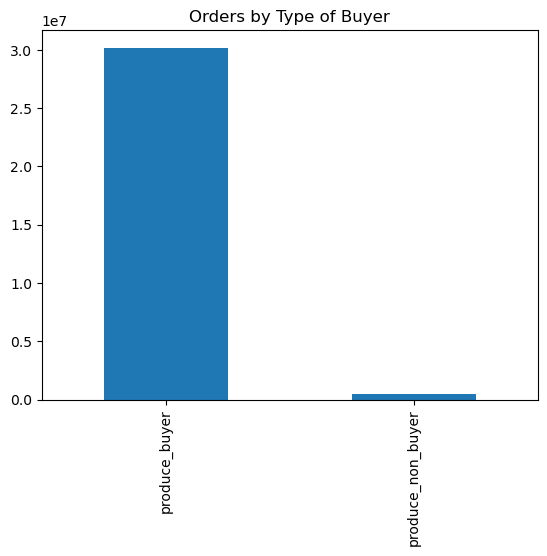

In [60]:
#Department (Produce)

produce_bar_chart = df_instacart_PII_clean['customer'].value_counts().plot.bar()
plt.title('Orders by Type of Buyer')

In [61]:
#Export

produce_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'produce_bar_chart.png'),bbox_inches='tight')

Text(0.5, 1.0, 'Orders by Type of Buyer')

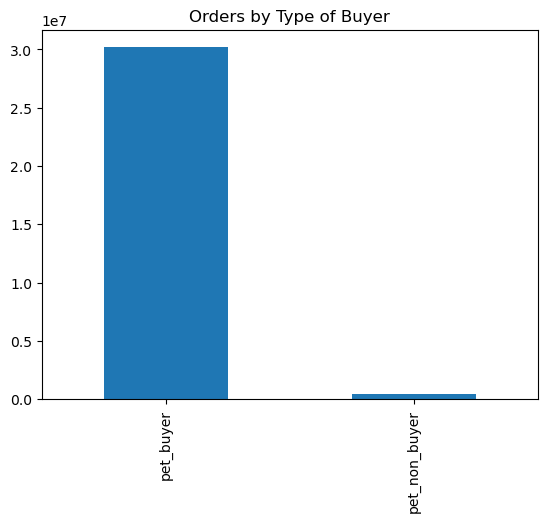

In [62]:
#Department (Pets)

pet_bar_chart = df_instacart_PII_clean['customer_1'].value_counts().plot.bar()
plt.title('Orders by Type of Buyer')

In [63]:
#Export

pet_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_bar_chart.png'),bbox_inches='tight')

Text(0.5, 1.0, 'Orders by Family Structure')

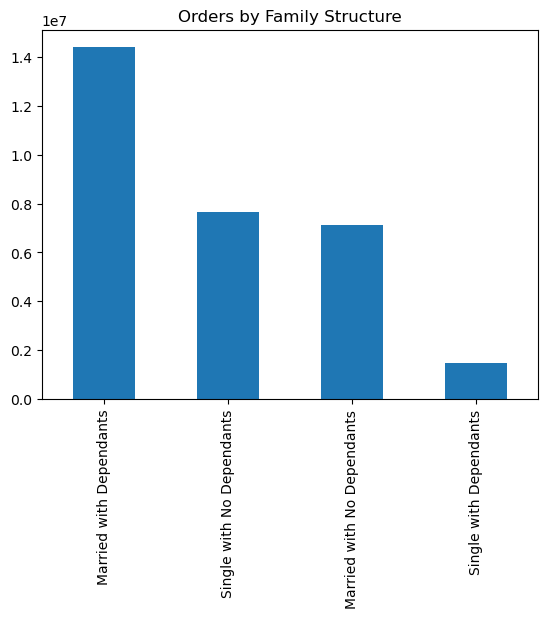

In [64]:
#Dependants

family_structure_bar_chart = df_instacart_PII_clean['Family Structure'].value_counts().plot.bar()
plt.title('Orders by Family Structure')

In [65]:
#Export

family_structure_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_structure_bar_chart.png'),bbox_inches='tight')

Text(0.5, 1.0, 'Orders by Region')

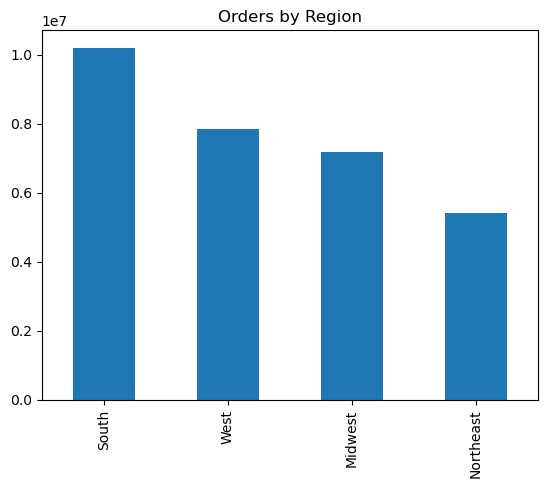

In [66]:
#Region

region_bar_chart = df_instacart_PII_clean['Region'].value_counts().plot.bar()
plt.title('Orders by Region')

In [67]:
#Export

region_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar_chart.png'),bbox_inches='tight')

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure;

In [68]:
#Age

crosstab_age = df_instacart_PII_clean.groupby('Age Group').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [69]:
#checking results

crosstab_age

order_id days_since_last_order                  prices  \
                count                   min       mean   max    min   
Age Group                                                             
Middle-aged  12006203                   0.0  11.109532  30.0    1.0   
Old          12873326                   0.0  11.104904  30.0    1.0   
Young         5750212                   0.0  11.125185  30.0    1.0   

                                 
                  mean      max  
Age Group                        
Middle-aged  11.806152  99999.0  
Old          11.886411  99999.0  
Young        12.215802  99999.0

In [70]:
#Income

crosstab_income = df_instacart_PII_clean.groupby('Income Class').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [71]:
#checking results

crosstab_income

order_id days_since_last_order                  prices  \
                 count                   min       mean   max    min   
Income Class                                                           
Higher Class   7657354                   0.0  11.026200  30.0    1.0   
Lower Class    7657453                   0.0  11.334471  30.0    1.0   
Middle Class  15314934                   0.0  11.041355  30.0    1.0   

                                  
                   mean      max  
Income Class                      
Higher Class  21.747114  99999.0  
Lower Class    7.293827  14900.0  
Middle Class   9.313175  99999.0

In [72]:
#Departments (Produce)

crosstab_customer = df_instacart_PII_clean.groupby('customer').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [73]:
#Departments (Pets)

crosstab_customer_1 = df_instacart_PII_clean.groupby('customer_1').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [74]:
#checking results

crosstab_customer

order_id days_since_last_order                  prices  \
                      count                   min       mean   max    min   
customer                                                                    
produce_buyer      30178572                   0.0  11.058971  30.0    1.0   
produce_non_buyer    451169                   0.0  14.794280  30.0    1.0   

                                       
                        mean      max  
customer                               
produce_buyer      11.872580  99999.0  
produce_non_buyer  14.873878  99999.0

In [75]:
#checking results

crosstab_customer_1

order_id days_since_last_order                  prices  \
                  count                   min       mean   max    min   
customer_1                                                              
pet_buyer      30182467                   0.0  11.059499  30.0    1.0   
pet_non_buyer    447274                   0.0  14.788100  30.0    1.0   

                                   
                    mean      max  
customer_1                         
pet_buyer      11.872035  99999.0  
pet_non_buyer  14.936835  99999.0

In [76]:
#Dependants

crosstab_dependants = df_instacart_PII_clean.groupby('Family Structure').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [77]:
#checking results

crosstab_dependants

order_id days_since_last_order                   \
                               count                   min       mean   max   
Family Structure                                                              
Married with Dependants     14374522                   0.0  11.122629  30.0   
Married with No Dependants   7134689                   0.0  11.126642  30.0   
Single with Dependants       1470832                   0.0  11.047268  30.0   
Single with No Dependants    7649698                   0.0  11.084925  30.0   

                           prices                      
                              min       mean      max  
Family Structure                                       
Married with Dependants       1.0  12.024109  99999.0  
Married with No Dependants    1.0  11.633986  99999.0  
Single with Dependants        1.0  10.958550  99999.0  
Single with No Dependants     1.0  12.163131  99999.0

In [78]:
#Region

crosstab_Region = df_instacart_PII_clean.groupby('Region').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [79]:
#checking results

crosstab_Region

order_id days_since_last_order                  prices             \
              count                   min       mean   max    min       mean   
Region                                                                         
Midwest     7176924                   0.0  11.188121  30.0    1.0  12.814354   
Northeast   5422025                   0.0  11.074020  30.0    1.0  11.594699   
South      10198982                   0.0  11.116169  30.0    1.0  12.043691   
West        7831810                   0.0  11.057400  30.0    1.0  11.152004   

                    
               max  
Region              
Midwest    99999.0  
Northeast  99999.0  
South      99999.0  
West       99999.0

In [80]:
#Activity Level

crosstab_activity_level = df_instacart_PII_clean.groupby('activity_level').agg({'order_id':['count'],'days_since_last_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [81]:
#checking results

crosstab_activity_level

order_id days_since_last_order                  prices  \
                   count                   min       mean   max    min   
activity_level                                                           
Active          29270938                   0.0  10.817463  30.0    1.0   
Low Activity     1358803                   0.0  19.500673  30.0    1.0   

                                    
                     mean      max  
activity_level                      
Active          11.868147  99999.0  
Low Activity    12.964619  99999.0

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [82]:
#Checking relationship between Regions and Departments (Produce)

Produce_Region = pd.crosstab(df_instacart_PII_clean['Region'], df_instacart_PII_clean['customer'], dropna = False)

In [83]:
#sorting values

Produce_Region = Produce_Region.sort_values(by=['produce_buyer'], ascending = True)

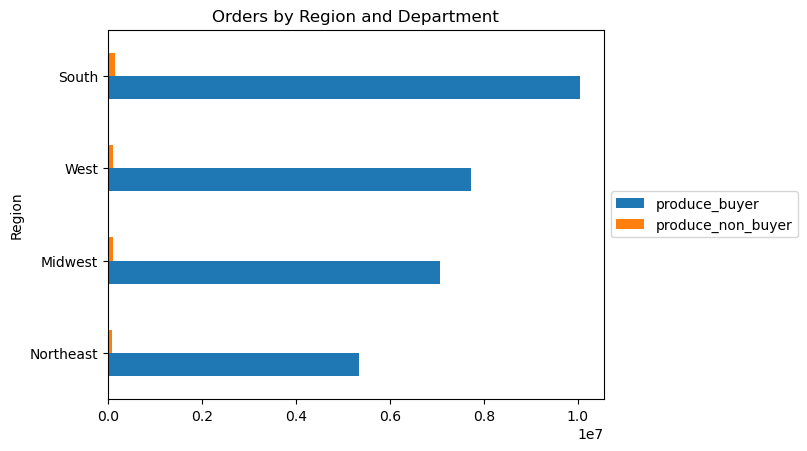

In [84]:
#Create a visualization displaying results

Produce_Region = Produce_Region.plot.barh()
plt.title('Orders by Region and Department')
plt.legend(loc= 'center left', bbox_to_anchor=(1.0, 0.5))

In [85]:
#Export

Produce_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Produce_Region_chart.png'),bbox_inches='tight')

In [86]:
#Checking relationship between Regions and Departments (Pets)

Pets_Region = pd.crosstab(df_instacart_PII_clean['Region'], df_instacart_PII_clean['customer_1'], dropna = False)

In [87]:
#sorting values

Pets_Region = Pets_Region.sort_values(by=['pet_buyer'], ascending = True)

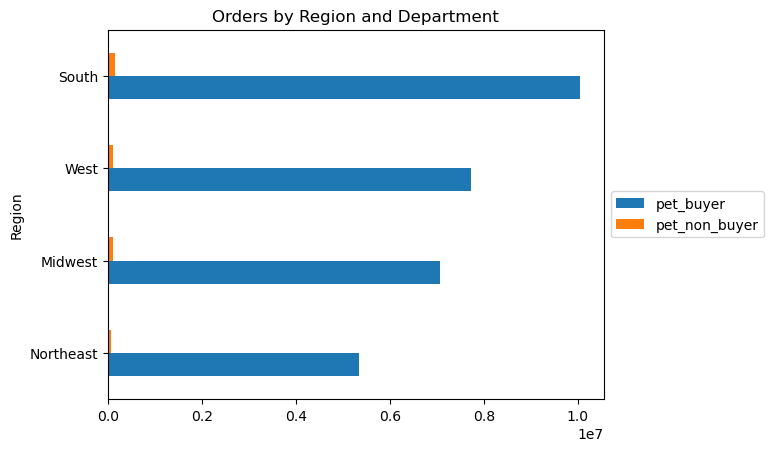

In [88]:
#Create a visualization displaying results

Pets_Region = Pets_Region.plot.barh()
plt.title('Orders by Region and Department')
plt.legend(loc= 'center left', bbox_to_anchor=(1.0, 0.5))

In [89]:
#Export

Pets_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pets_Region_chart.png'),bbox_inches='tight')

There does not seem to be a significant link regarding orders when comparing the Regions and Department profiles;

In [90]:
#Checking relationship between Age Group and Family Structure

Age_Family = pd.crosstab(df_instacart_PII_clean['Age Group'], df_instacart_PII_clean['Family Structure'], dropna = False)

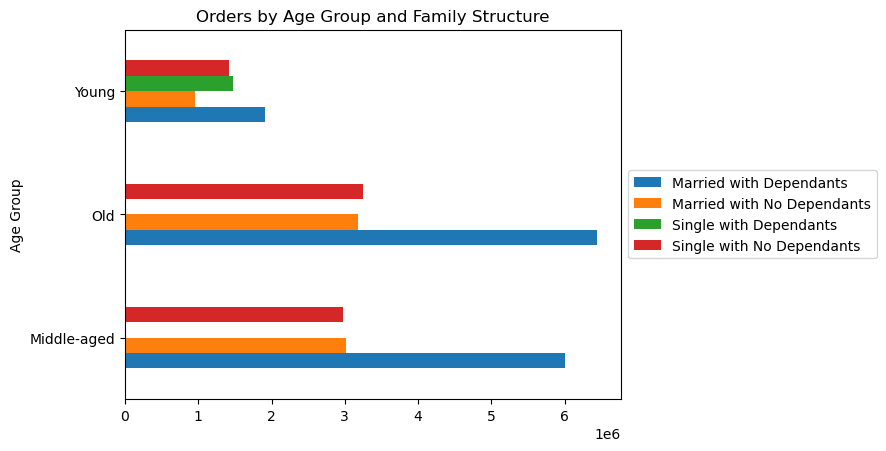

In [91]:
#Create a visualization displaying results

Age_Family = Age_Family.plot.barh()
plt.title('Orders by Age Group and Family Structure')
plt.legend(loc= 'center left', bbox_to_anchor=(1.0, 0.5))

In [92]:
#Export

Age_Family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_Family_chart.png'),bbox_inches='tight')

In [93]:
#Checking relationship between Age Group and Order Hour

Age_Hour = pd.crosstab(df_instacart_PII_clean['order_hour_of_day'], df_instacart_PII_clean['Age Group'], dropna = False)

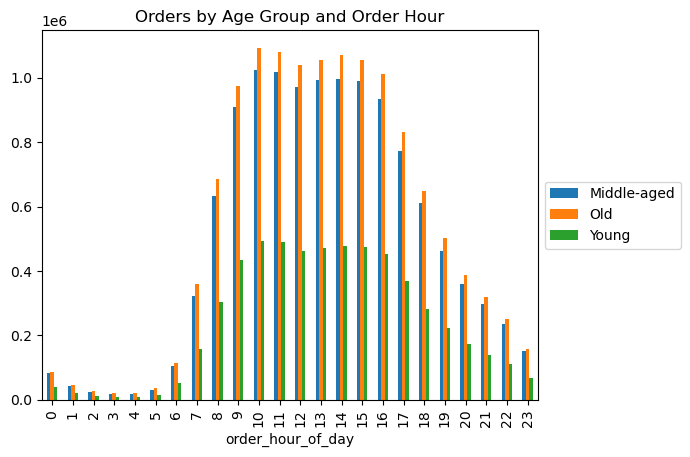

In [94]:
#Create a visualization displaying results

Age_Hour = Age_Hour.plot.bar()
plt.title('Orders by Age Group and Order Hour')
plt.legend(loc= 'center left', bbox_to_anchor=(1.0, 0.5))

In [95]:
#Export

Age_Hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_Hour_chart.png'),bbox_inches='tight')

In [96]:
#Checking relationship between Age Group and Order Hour

Income_Hour = pd.crosstab(df_instacart_PII_clean['order_hour_of_day'], df_instacart_PII_clean['Income Class'], dropna = False)

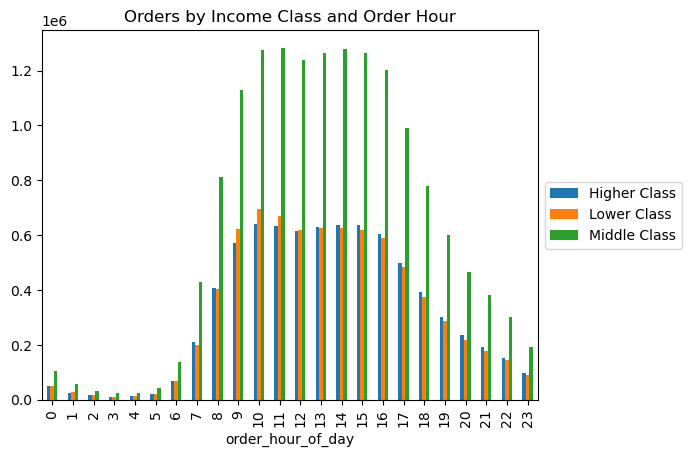

In [97]:
#Create a visualization displaying results

Income_Hour = Income_Hour.plot.bar()
plt.title('Orders by Income Class and Order Hour')
plt.legend(loc= 'center left', bbox_to_anchor=(1.0, 0.5))

In [98]:
#Export

Income_Hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_Hour_chart.png'),bbox_inches='tight')

Text(0.5, 1.0, 'Orders by Price Range')

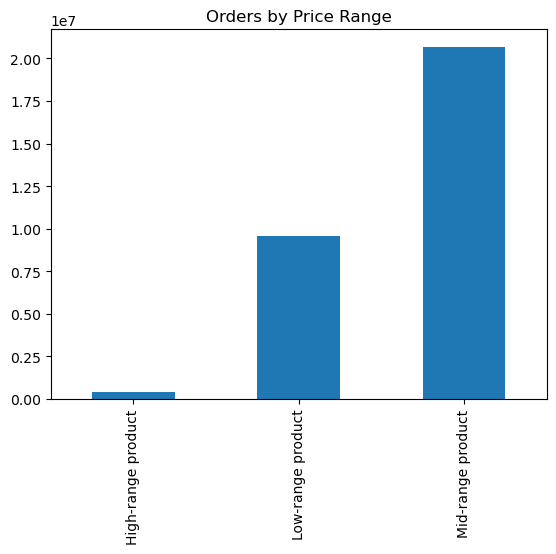

In [99]:
#Price Range Graph

Price_Range = df_instacart_PII_clean['price_range_loc'].value_counts().sort_values().plot.bar()
plt.title('Orders by Price Range')

In [100]:
#Export

Price_Range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_Range_chart.png'),bbox_inches='tight')

In [101]:
# Export to pickle file

df_instacart_PII_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_Final.pkl'))